In [1]:
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage
import time
from basefunctions import *
from matching.matching_contextclass import MatchContextClass
from matching.method1 import MatchingMethod1
from matching.method2 import MatchingMethod2
from matching.methodbymedoids import MatchingMethodByMedoids
from matching.trianglerulemethod import MatchingTriangleRuleMethod
from preprocessing.preprocessing_contextclass import PreprocessContextClass
from preprocessing.preprocess_medoids import MedoidsFinder
from preprocessing.preprocess_trianglerule import DataForAccelerationFinder
from preprocessing.preprocess_granulation1 import GranulationWithThreshold
from preprocessing.preprocess_granulation2 import GranulationStartedFromMin

Знаходження дескрипторів еталонних зображень.

In [2]:
features = cv2.ORB_create(500)

image1 = cv2.imread('etalonimages//sparrow3.jpg')
image1gray = makeImgGray(image1)
image2 = cv2.imread('etalonimages//synychka1.jpg')
image2gray = makeImgGray(image2)
image3 = cv2.imread('etalonimages//lastivka1.jpg')
image3gray = makeImgGray(image3)
image4 = cv2.imread('etalonimages//pigeon5.jpg')
image4gray = makeImgGray(image4)
image5 = cv2.imread('etalonimages//raven1.jpg')
image5gray = makeImgGray(image5)

print ("   sparrow")
des2 = findKeypoints(image1gray, features)
bit_des_etalon1 = convertAllDescriptors(des2)

print ("   synychka")
des2 = findKeypoints(image2gray, features)
bit_des_etalon2 = convertAllDescriptors(des2)

print ("   lastivka")
des2 = findKeypoints(image3gray, features)
bit_des_etalon3 = convertAllDescriptors(des2)

print ("   pigeon")
des2 = findKeypoints(image4gray, features)
bit_des_etalon4 = convertAllDescriptors(des2)

print ("   raven")
des2 = findKeypoints(image5gray, features)
bit_des_etalon5 = convertAllDescriptors(des2)

bit_des_etalons = [bit_des_etalon1, bit_des_etalon2, bit_des_etalon3, bit_des_etalon4, bit_des_etalon5]

   sparrow
num of descriptors: 493
   synychka
num of descriptors: 482
   lastivka
num of descriptors: 485
   pigeon
num of descriptors: 481
   raven
num of descriptors: 492


Обробка зображення, що буде класифікуватися, знаходження дескрипторів.

In [3]:
image_to_classify = cv2.imread('etalonimages//lastivka1.jpg')
image_to_classify = ndimage.rotate(image_to_classify, 45)
image_to_classify = makeImgGray(image_to_classify)
des1 = findKeypoints(image_to_classify, features)
bit_des_img = convertAllDescriptors(des1)

num of descriptors: 500


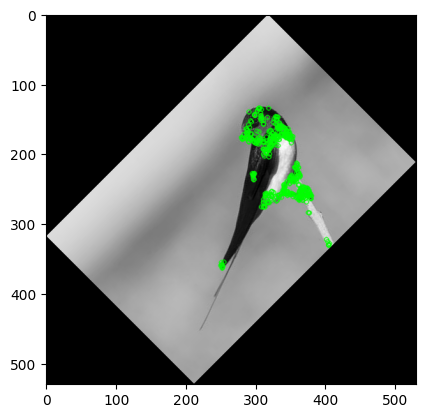

In [4]:
(keypoints1, des1) = features.detectAndCompute(image_to_classify, None)
output_image = cv2.drawKeypoints(image_to_classify, keypoints1, 0, (0, 255, 0),
							flags=cv2.DRAW_MATCHES_FLAGS_DEFAULT)
plt.imshow(output_image)
plt.show()

Класифікація базовим структурним методом.

In [5]:
print("method1")
method1 = MatchingMethod1()
matcher = MatchContextClass(method1)

method1


In [6]:
result_method1 = matcher.match_images(bit_des_img, bit_des_etalons)
print (result_method1)

[2, 8, 450, 2, 7]


Класифікація роздільним методом.

In [7]:
print("method2")
method2 = MatchingMethod2()
matcher.set_strategy(method2)
result_method2 = matcher.match_images(bit_des_img, bit_des_etalons)
print (result_method2)

method2
[206, 208, 461, 169, 183]


Класифікація за відстанню до медоїда.

In [8]:
print("by distance to medoids")
imgpreprocessor_medoids = MedoidsFinder()
imgpreprocessor = PreprocessContextClass(imgpreprocessor_medoids)

by distance to medoids


In [9]:
medoids = imgpreprocessor.descriptors_preprocessing(bit_des_etalons)
method3 = MatchingMethodByMedoids()
matcher.set_strategy(method3)
result_method3 = matcher.match_images(bit_des_img, medoids)
print (result_method3)

[86, 107, 191, 65, 51]


Класифікація використовуючи правило трикутника.

In [10]:
print("accelerating distance")
imgpreprocessor_trianglerule = DataForAccelerationFinder()
imgpreprocessor = PreprocessContextClass(imgpreprocessor_trianglerule)
medoids, cmins, cmaxs = imgpreprocessor.descriptors_preprocessing(bit_des_etalons)
dataforaccelerating = medoids, cmins, cmaxs
method4 = MatchingTriangleRuleMethod()
matcher.set_strategy(method4)
result_method4 = matcher.match_images(bit_des_img, dataforaccelerating)
print (result_method4)

accelerating distance
left parts, cmax
[48, 13, 28, 354, 57]


Класифікація базовим методом застосувавши грануляцію за пороговим значенням.

In [11]:
print("granulation1 method1")
granulation1 = GranulationWithThreshold()
imgpreprocessor.set_strategy(granulation1)
reduced_descset_etalons1 = imgpreprocessor.descriptors_preprocessing(bit_des_etalons)
matcher.set_strategy(method1)
result_withgranulation1 = matcher.match_images(bit_des_img, reduced_descset_etalons1)
print(result_withgranulation1)

granulation1 method1
[13, 14, 404, 10, 8]


Класифікація базовим методом застосувавши грануляцію з видаленням за найменшими відстанями.

In [12]:
print("granulation2 method1")
granulation2 = GranulationStartedFromMin()
imgpreprocessor.set_strategy(granulation2)
reduced_descset_etalons2 = imgpreprocessor.descriptors_preprocessing(bit_des_etalons)
matcher.set_strategy(method1)
result_withgranulation2 = matcher.match_images(bit_des_img, reduced_descset_etalons2)
print(result_withgranulation2)

granulation2 method1
[4, 14, 413, 4, 12]
